# Decision Tree into play or not a game

---

In [1]:
import pandas as pd
from matplotlib import pyplot as plot
import sklearn.tree as skl
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [2]:
#Adquiere los datos desde un archivo csv usando biblioteca PANDAS
dataframe = pd.read_csv('volleyball.csv', encoding='ISO-8859-1')


In [3]:
#Preprocesamiento (Transformar valores categóricos a numéricos)
outlook=LabelEncoder()
temp=LabelEncoder()
humidity=LabelEncoder()
windy=LabelEncoder()
play=LabelEncoder()


In [4]:
dataframe['outlook']=outlook.fit_transform(dataframe['outlook'])
dataframe['temp']=temp.fit_transform(dataframe['temp'])
dataframe['humidity']=humidity.fit_transform(dataframe['humidity'])
dataframe['windy']=windy.fit_transform(dataframe['windy'])
dataframe['play']=play.fit_transform(dataframe['play'])


In [5]:
#Prepara los datos
features_cols=['outlook','temp','humidity','windy']
X=dataframe[features_cols]
y=dataframe.play


In [6]:
#Entrenamiento
tree = skl.DecisionTreeClassifier(criterion='gini')
tree.fit(X,y)

DecisionTreeClassifier()

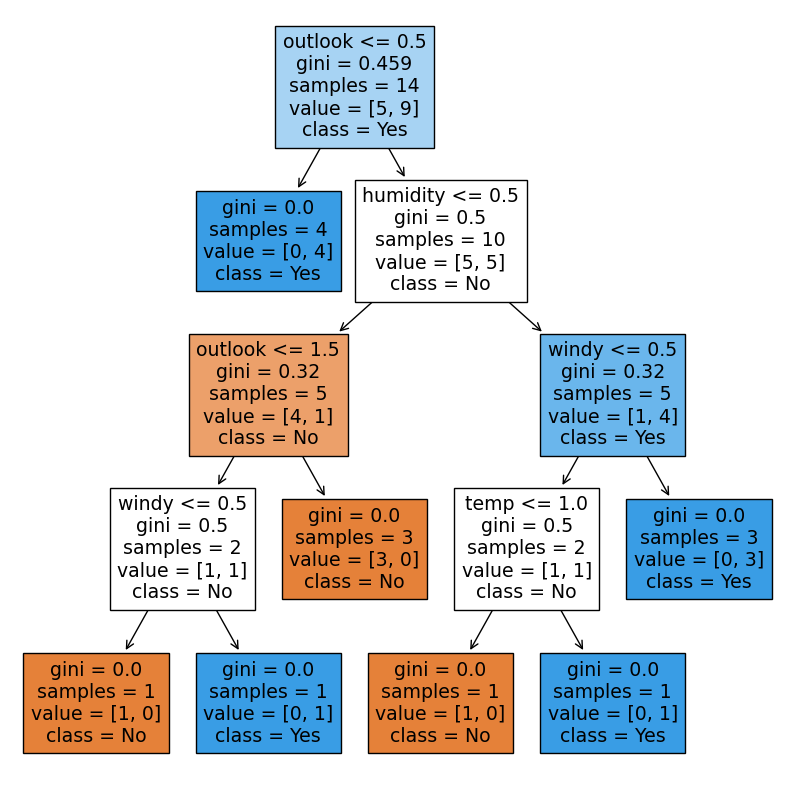

In [7]:
#Visualización
px = 1/plot.rcParams['figure.dpi']  # Pixel in pulgadas
fig = plot.figure(figsize=(1000*px,1000*px)) 
_ = plot_tree(tree, feature_names=features_cols, class_names=['No','Yes'], filled=True)



In [8]:
# Probar el Modelo

dfprueba = pd.DataFrame()
dfprueba[ 'outlook'] = [1] # rain
dfprueba[ 'temp'] = [0] # cool
dfprueba[ 'humidity'] = [0] # high
dfprueba[ 'windy'] =[0] # strong

prediccion = tree.predict(dfprueba)

In [9]:
print('Resultado de la prueba')
print('**********************')
print('Con los datos')
print(dfprueba)
print('\nSe recomienda:')
if(prediccion[0]==0):
    print('NO hacer deporte')
else:
    print('SI hacer deporte')
print("**********************")    


Resultado de la prueba
**********************
Con los datos
   outlook  temp  humidity  windy
0        1     0         0      0

Se recomienda:
NO hacer deporte
**********************
